In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib as plt
sixties = pd.read_csv("..//Datasets/dataset-of-60s.csv") 
sixties.head()


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [2]:
sixties[["danceability",
        "energy",
        "key",
        "loudness",
        "mode",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
        "tempo",
        "duration_ms",
        "time_signature",
        "chorus_hit",
        "sections"]].corr(method='pearson')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
danceability,1.000000,0.349095,-0.006606,0.298229,0.072913,0.160166,-0.283972,-0.239608,-0.060480,0.662446,0.031963,-0.169707,0.213776,-0.017748,-0.142973
energy,0.349095,1.000000,0.003742,0.748977,0.044795,-0.024364,-0.568097,-0.186577,0.139042,0.645554,0.213071,-0.080996,0.205242,0.002156,-0.082325
key,-0.006606,0.003742,1.000000,-0.009977,-0.083163,0.034207,-0.000001,-0.024467,0.010648,-0.003881,0.012581,0.000235,0.002944,0.012012,-0.004707
loudness,0.298229,0.748977,-0.009977,1.000000,0.074783,-0.146794,-0.388212,-0.344541,0.078104,0.508386,0.139208,-0.120009,0.132473,-0.021465,-0.100095
mode,0.072913,0.044795,-0.083163,0.074783,1.000000,-0.014062,-0.021651,-0.125554,0.011389,0.084663,0.038588,-0.064355,-0.013471,-0.011262,-0.047983
speechiness,0.160166,-0.024364,0.034207,-0.146794,-0.014062,1.000000,0.038474,-0.061913,0.132924,-0.007219,0.007050,0.014385,0.013825,0.006138,-0.017228
acousticness,-0.283972,-0.568097,-0.000001,-0.388212,-0.021651,0.038474,1.000000,0.156642,0.004113,-0.415820,-0.158973,0.040026,-0.159261,-0.004406,0.037803
instrumentalness,-0.239608,-0.186577,-0.024467,-0.344541,-0.125554,-0.061913,0.156642,1.000000,-0.087662,-0.278928,-0.059885,0.123042,-0.026709,0.005901,0.094470
liveness,-0.060480,0.139042,0.010648,0.078104,0.011389,0.132924,0.004113,-0.087662,1.000000,0.065821,0.011016,0.016813,0.007570,0.022989,0.000703
valence,0.662446,0.645554,-0.003881,0.508386,0.084663,-0.007219,-0.415820,-0.278928,0.065821,1.000000,0.230378,-0.209133,0.225917,-0.018313,-0.171499


[Text(0, 0.5, 'Tempo'), Text(0.5, 0, 'Energy')]

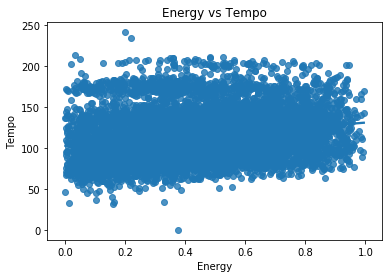

In [3]:
ax= sns.regplot(data=sixties,
                x="energy",
                y="tempo");
ax.set(xlabel="Energy", ylabel="Tempo", title="Energy vs Tempo")

ax.set(xlabel= "Energy", 
       ylabel= "Tempo")

[Text(0, 0.5, 'Liveness'), Text(0.5, 0, 'Energy')]

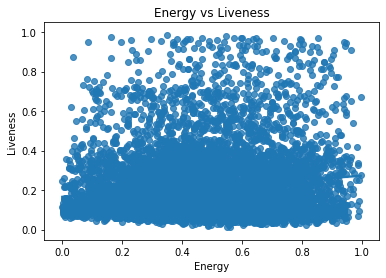

In [4]:
ax= sns.regplot(data=sixties,
                x="energy",
                y="liveness");
ax.set(xlabel="Energy", ylabel="Liveness", title="Energy vs Liveness")

ax.set(xlabel= "Energy", 
       ylabel= "Liveness")

In [5]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);